# Lecture 5 - Examples

## Forward propagation

In [4]:
import numpy as np

input_data = np.array([1,2])
weights = {'node0': np.array([1,1]), 'node1': np.array([-1,1]), 'output': np.array([2,-1])}

#Top node of the hidden layer
node_0_value = (input_data * weights['node0']).sum()

#Bottom node of the hidden layer
node_1_value = (input_data + weights['node1']).sum()

hidden_layer_results = np.array([node_0_value, node_1_value])
print(hidden_layer_results)

output = (hidden_layer_results * weights['output']).sum()
print(output)

[3 3]
3


## Gradient descent

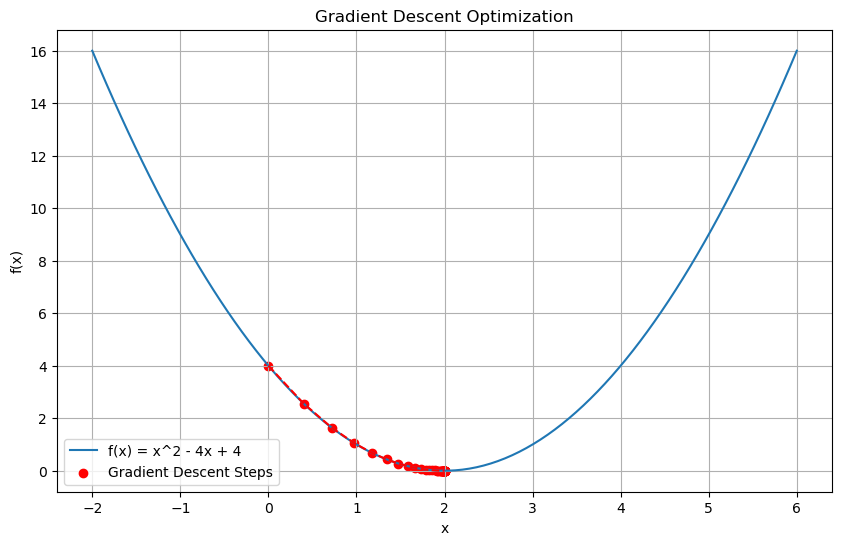

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its derivative
def function(x):
    return x**2 - 4*x + 4

def derivative(x):
    return 2*x - 4

# Gradient Descent parameters
learning_rate = 0.1
initial_x = 0.0  # Starting point
iterations = 50

# Arrays to store the values of x and f(x) for each iteration
x_values = [initial_x]
f_values = [function(initial_x)]

# Gradient Descent Algorithm
x = initial_x
for i in range(iterations):
    gradient = derivative(x)
    x = x - learning_rate * gradient
    x_values.append(x)
    f_values.append(function(x))

# Plotting the function and the gradient descent steps
x_range = np.linspace(-2, 6, 100)
y_range = function(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label="f(x) = x^2 - 4x + 4")
plt.scatter(x_values, f_values, color='red', label="Gradient Descent Steps")
plt.plot(x_values, f_values, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()


## Backpropagation

In [7]:
import numpy as np

# Define the Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Input data (4 samples, each with 3 features)
inputs = np.array([[0, 0, 1],
                   [0, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

# Output data (target values for each sample)
outputs = np.array([[0], [1], [1], [0]])

# Seed for reproducibility
np.random.seed(42)

# Initialize weights randomly with mean 0
input_layer_neurons = inputs.shape[1]
hidden_layer_neurons = 2
output_neurons = 1

# Weights and biases initialization
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Learning rate
learning_rate = 0.1
iterations = 10000

# Training the neural network using backpropagation
for _ in range(iterations):
    # Forward Propagation
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_activation = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_activation, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)
    
    # Compute the error
    error = outputs - predicted_output
    
    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)
    
    # Update weights and biases
    weights_hidden_output += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Print the final outputs and weights
print("Final hidden layer weights:\n", weights_input_hidden)
print("Final hidden layer bias:\n", bias_hidden)
print("Final output layer weights:\n", weights_hidden_output)
print("Final output layer bias:\n", bias_output)
print("Predicted output:\n", predicted_output)


Final hidden layer weights:
 [[ 4.22112096  5.75560552]
 [ 4.22531711  5.77001607]
 [-3.22831629 -1.621606  ]]
Final hidden layer bias:
 [[-3.32625132 -0.91142438]]
Final output layer weights:
 [[-7.91676924]
 [ 7.33539093]]
Final output layer bias:
 [[-3.37949121]]
Predicted output:
 [[0.05463184]
 [0.95148253]
 [0.95142762]
 [0.05096355]]


## CNN

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range of [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the images to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert the labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


2024-07-28 12:49:43.858235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

2024-07-28 12:50:21.199296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
844/844 [==============================] - 7s 8ms/step - loss: 0.2066 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9838
Epoch 2/5
844/844 [==============================] - 6s 8ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0418 - val_accuracy: 0.9873
Epoch 3/5
844/844 [==============================] - 6s 8ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0342 - val_accuracy: 0.9895
Epoch 4/5
844/844 [==============================] - 6s 8ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0391 - val_accuracy: 0.9898
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0427 - accuracy: 0.9878
Test accuracy: 0.9878000020980835
